# ボックス・ミュラー法と１次元ブラウン運動

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

Box-Muller法で標準正規乱数をつくる

In [2]:
def BoxMuller(X):
    return [np.sqrt(-2*np.log(X[0]))*np.cos(2*np.pi*X[1]),
            np.sqrt(-2*np.log(X[0]))*np.sin(2*np.pi*X[1])]

In [3]:
N = 2**16
Y = np.zeros(N)
for n in range(N//2):
    y = BoxMuller(np.random.random(2))
    Y[2*n] = y[0]
    Y[2*n+1] = y[1]

ヒストグラムを描く

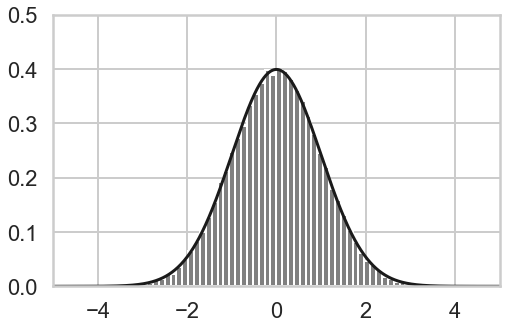

In [4]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlim(-5,5)
ax.set_ylim(0, 0.5)
X = np.linspace(-5, 5, 1024)
count, bins, ignored = ax.hist(Y, bins=64, density=True, color='grey')
ax.plot(X, np.exp(-0.5*X**2)/np.sqrt(2*np.pi), '-k', linewidth=3.0)
#plt.savefig('BoxMuller.pdf', bbox_inches='tight')

ブラウン運動のシミュレーション

In [5]:
h = 2**(-10)
N = 2**10
dW = np.insert(np.random.normal(loc=0.0, scale=h, size=N), 0, 0.0)
W = np.cumsum(dW)

Text(0, 0.5, '$W(t)$')

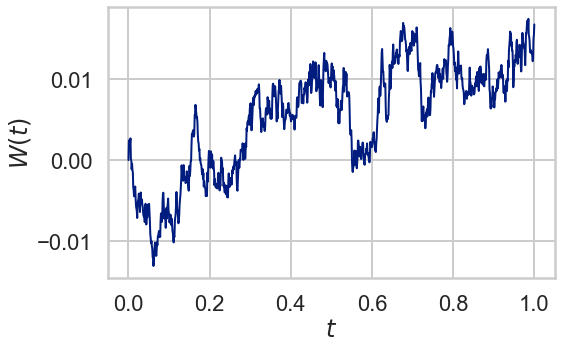

In [6]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(np.linspace(0, N*h, N+1), W, '-')
ax.set_xlabel('$t$')
ax.set_ylabel('$W(t)$')
# plt.savefig("BrownianMotion.pdf", bbox_inches='tight')

In [7]:
Samples = 512
h = 2**(-12)
N = 2**12
A = np.zeros((Samples, N+1))
for s in range(Samples):
    np.random.seed(s)
    dW = np.insert(np.random.normal(loc=0.0, scale=np.sqrt(h), size=N), 0, 0.0)
    W = np.cumsum(dW)
    A[s] = W**2

In [8]:
E = np.average(A, axis=0)

分散の時間変化

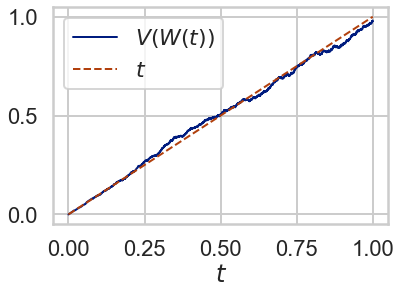

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$t$')
ax.plot(np.linspace(0, 1, N+1), E, '-', label='$V(W(t))$')
ax.plot(np.linspace(0,1.0,500), np.linspace(0,1.0,500), '--', label='$t$')
ax.legend()
# plt.savefig("BM1DVariance.pdf", bbox_inches='tight')